In [18]:
!pip install imblearn

distributed 1.21.8 requires msgpack, which is not installed.
jupyterlab-server 1.0.0 has requirement jsonschema>=3.0.1, but you'll have jsonschema 2.6.0 which is incompatible.
You are using pip version 10.0.1, however version 20.3.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('TRAIN.csv')

In [3]:
data.head()

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,2.245295,-1.160960,-1.966682,-1.430190,-0.607246,-1.508696,-0.074415,-0.655096,-1.970141,...,0.010490,0.521714,-0.064971,0.048849,0.383290,0.103970,-0.047350,-0.064800,74.75,0
1,1,1.278609,0.102574,0.512079,0.003930,-0.723474,-1.334105,0.029958,-0.296595,0.128119,...,-0.081470,-0.182506,0.078986,0.789993,0.219794,0.938359,-0.078720,0.008119,1.38,0
2,2,1.466457,0.026088,-0.499298,-0.674372,-0.144883,-1.178075,0.058089,-0.420145,-1.359651,...,-0.234087,-0.710542,-0.001242,-0.174713,0.533719,-0.454779,0.001524,0.030935,10.95,0
3,3,-0.922137,-0.371579,2.132018,-0.796997,0.324175,-1.162006,0.277208,-0.249586,-0.775648,...,-0.302654,-0.246899,-0.045745,0.677110,0.016109,-0.734220,-0.034480,-0.064786,8.04,0
4,4,-1.166525,0.255439,2.108464,0.135019,-0.072979,0.910821,0.755918,0.355528,-0.422820,...,0.136470,0.017496,0.121017,0.636266,0.492943,-0.750242,0.029124,0.091303,175.00,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284455 entries, 0 to 284454
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Index   284455 non-null  int64  
 1   V1      284455 non-null  float64
 2   V2      284455 non-null  float64
 3   V3      284455 non-null  float64
 4   V4      284455 non-null  float64
 5   V5      284455 non-null  float64
 6   V6      284455 non-null  float64
 7   V7      284455 non-null  float64
 8   V8      284455 non-null  float64
 9   V9      284455 non-null  float64
 10  V10     284455 non-null  float64
 11  V11     284455 non-null  float64
 12  V12     284455 non-null  float64
 13  V13     284455 non-null  float64
 14  V14     284455 non-null  float64
 15  V15     284455 non-null  float64
 16  V16     284455 non-null  float64
 17  V17     284455 non-null  float64
 18  V18     284455 non-null  float64
 19  V19     284455 non-null  float64
 20  V20     284455 non-null  float64
 21  V21     28

In [5]:
data.describe()

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,...,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000,284455.000000
mean,142227.000000,0.000779,-0.000811,0.001275,-0.000793,0.000592,0.000186,0.000951,-0.000270,0.000505,...,-0.000171,-0.000050,0.000027,0.000018,-0.000051,0.000028,-0.000037,-0.000028,88.359646,0.001547
std,82115.229749,1.956147,1.650234,1.510626,1.414216,1.378329,1.332161,1.232971,1.190897,1.097805,...,0.732765,0.725495,0.624473,0.605645,0.521274,0.482243,0.403488,0.330127,250.177771,0.039299
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,71113.500000,-0.920117,-0.598750,-0.889749,-0.848835,-0.691343,-0.768227,-0.553788,-0.208633,-0.642669,...,-0.228434,-0.542432,-0.161861,-0.354545,-0.317194,-0.326951,-0.070845,-0.052957,5.600000,0.000000
50%,142227.000000,0.018330,0.065238,0.179953,-0.020206,-0.054243,-0.274172,0.040265,0.022328,-0.051183,...,-0.029520,0.006675,-0.011192,0.040977,0.016461,-0.052077,0.001337,0.011238,22.000000,0.000000
75%,213340.500000,1.315693,0.803357,1.027332,0.742635,0.612015,0.398641,0.570515,0.327214,0.597346,...,0.186326,0.528481,0.147659,0.439527,0.350697,0.240929,0.091023,0.078271,77.200000,0.000000
max,284454.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [6]:
data.Class.unique()

array([0, 1], dtype=int64)

In [7]:
data[data.duplicated()]

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [8]:
data.Class.value_counts()

0    284015
1       440
Name: Class, dtype: int64

In [9]:
data.corr()

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Index,1.000000,-0.000530,-0.003201,0.001798,-0.001309,0.003252,0.000980,-0.000645,-0.001832,0.001531,...,-0.000661,-0.001484,-0.000897,-0.000734,-0.002744,0.004123,-0.003340,0.001763,-0.000132,-0.000619
V1,-0.000530,1.000000,0.002475,-0.004452,0.001875,-0.003053,-0.000821,-0.004349,0.001714,-0.001686,...,0.001398,-0.000425,-0.000041,-0.000057,0.000474,-0.000088,0.000624,0.000050,-0.228112,-0.096373
V2,-0.003201,0.002475,1.000000,0.003680,-0.001928,0.002135,0.000729,0.003479,-0.001018,0.001442,...,-0.001457,0.000521,-0.000129,0.000115,-0.000455,-0.000003,-0.000749,-0.000134,-0.531930,0.086505
V3,0.001798,-0.004452,0.003680,1.000000,0.003698,-0.004458,-0.001599,-0.007041,0.003173,-0.003016,...,0.002047,-0.000445,-0.000018,-0.000279,0.000803,0.000235,0.001527,0.000183,-0.211714,-0.183220
V4,-0.001309,0.001875,-0.001928,0.003698,1.000000,0.001972,0.000889,0.003352,-0.001340,0.001905,...,-0.000977,0.000320,-0.000036,0.000314,-0.000405,-0.000226,-0.000655,-0.000086,0.098931,0.127422
V5,0.003252,-0.003053,0.002135,-0.004458,0.001972,1.000000,-0.001038,-0.004656,0.002383,-0.001656,...,0.001210,-0.000437,-0.000262,0.000047,0.000540,-0.000048,0.000769,-0.000075,-0.387002,-0.089295
V6,0.000980,-0.000821,0.000729,-0.001599,0.000889,-0.001038,1.000000,-0.001043,0.001295,-0.000699,...,-0.000139,0.000100,-0.000170,0.000014,0.000232,0.000069,0.000270,0.000121,0.216139,-0.041521
V7,-0.000645,-0.004349,0.003479,-0.007041,0.003352,-0.004656,-0.001043,1.000000,0.001795,-0.002781,...,0.002896,-0.000845,0.000304,-0.000135,0.000717,0.000117,0.001321,0.000201,0.398734,-0.180110
V8,-0.001832,0.001714,-0.001018,0.003173,-0.001340,0.002383,0.001295,0.001795,1.000000,0.001157,...,0.002831,-0.000932,0.000995,-0.000119,-0.000463,-0.000006,-0.000462,0.000176,-0.103419,0.015590
V9,0.001531,-0.001686,0.001442,-0.003016,0.001905,-0.001656,-0.000699,-0.002781,0.001157,1.000000,...,0.000537,-0.000103,-0.000071,-0.000056,0.000145,0.000125,0.000563,0.000061,-0.044275,-0.093588


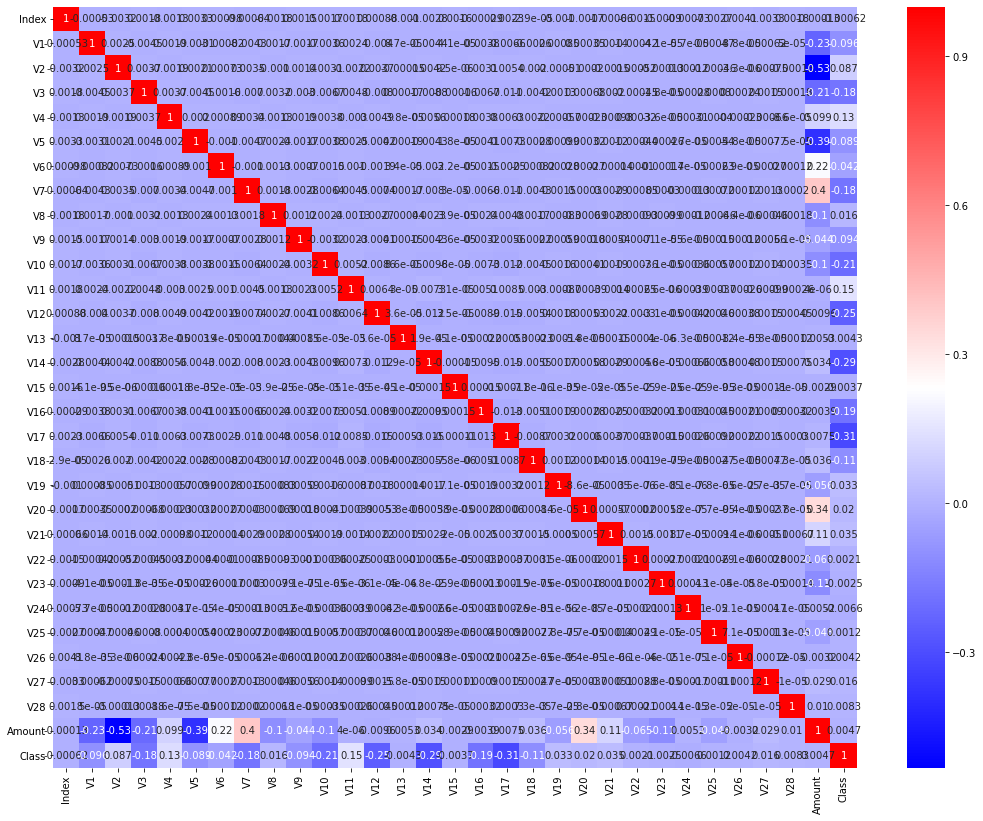

In [10]:
plt.figure(figsize=(18, 14))
sns.heatmap(data.corr(), cmap='bwr', annot=True) 

In [57]:
X = data.drop(['Class', 'Index'], axis = 1)   
y = data.Class

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer
from time import time

In [15]:
def pipeline(learner_list, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    # Get length of Training Data:
    size = len(y_train)
    
    results = {}
    final_results = []
    
    for learner in learner_list:
        
        # Store the learner name:
        results['Algorithm'] = learner.__class__.__name__

        # Fit the learner:
        start = time() # Get start time
        print("Training {}".format(learner.__class__.__name__))
        learner = learner.fit(X_train, y_train)
        end = time() # Get end time

        # Store the training time
        results['Training Time'] = end - start

        start = time() # Get start time
        predictions_test = learner.predict(X_test)
        predictions_train = learner.predict(X_train)
        end = time() # Get end time

        # Store the prediction time
        results['Prediction Time'] = end - start

        # Compute the Accuracy on Test Set
        results['Accuracy: Test'] = accuracy_score(y_test, predictions_test)

        # Compute the Accuracy on Training Set
        results['Accuracy: Train'] = accuracy_score(y_train, predictions_train)

        # Compute the F1 Score on Test Set
        results['F1 Score: Test'] = f1_score(y_test, predictions_test)

        # Compute the F1 Score on Training Set
        results['F1 Score: Train'] = f1_score(y_train, predictions_train)

        # Compute the Precision on Test Set
        results['Precision: Test'] = precision_score(y_test, predictions_test)

        # Compute the Precision on Training Set
        results['Precision: Train'] = precision_score(y_train, predictions_train)

        # Compute the Recall on Test Set
        results['Recall: Test'] = recall_score(y_test, predictions_test)

        # Compute the Recall on Training Set
        results['Recall: Train'] = recall_score(y_train, predictions_train)

        # Success
        print("Training {} finished in {:.2f} sec".format(learner.__class__.__name__, results['Training Time']))
        print('----------------------------------------------------')
        
        final_results.append(results.copy())
    # Return a dataframe of the results
    return final_results

In [16]:
models = [DecisionTreeClassifier(), LinearSVC(), AdaBoostClassifier(), 
          RandomForestClassifier(), BaggingClassifier(),
         LogisticRegression(), SGDClassifier()]

In [17]:
re = pipeline(models, X_train, y_train, X_test, y_test)
results = pd.DataFrame(re)
results = results.reindex(columns = ['Algorithm', 'Accuracy: Test', 'Precision: Test', 'Recall: Test', 'F1 Score: Test', 'Prediction Time',
                          'Accuracy: Train', 'Precision: Train', 'Recall: Train', 'F1 Score: Train', 'Training Time'])

Training DecisionTreeClassifier
Training DecisionTreeClassifier finished in 13.03 sec
----------------------------------------------------
Training LinearSVC


C:\Users\piyu9\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training LinearSVC finished in 50.77 sec
----------------------------------------------------
Training AdaBoostClassifier
Training AdaBoostClassifier finished in 57.81 sec
----------------------------------------------------
Training RandomForestClassifier
Training RandomForestClassifier finished in 171.02 sec
----------------------------------------------------
Training BaggingClassifier
Training BaggingClassifier finished in 96.99 sec
----------------------------------------------------
Training LogisticRegression
Training LogisticRegression finished in 2.63 sec
----------------------------------------------------
Training SGDClassifier
Training SGDClassifier finished in 0.38 sec
----------------------------------------------------


In [18]:
results = results.reindex(columns = ['Algorithm', 'F1 Score: Test', 'F1 Score: Train', 'Accuracy: Test', 'Precision: Test', 'Recall: Test', 'Prediction Time',
                          'Accuracy: Train', 'Precision: Train', 'Recall: Train', 'Training Time'])

results.sort_values(by = 'F1 Score: Test', inplace = True, ascending = False)

In [19]:
results.reset_index(drop = True)

,Algorithm,F1 Score: Test,F1 Score: Train,Accuracy: Test,Precision: Test,Recall: Test,Prediction Time,Accuracy: Train,Precision: Train,Recall: Train,Training Time
0,RandomForestClassifier,0.871369,1.000000,0.999637,0.972222,0.789474,3.672915,1.000000,1.000000,1.000000,171.021049
1,BaggingClassifier,0.840000,0.973333,0.999531,0.897436,0.789474,0.870853,0.999920,0.996587,0.951140,96.985536
2,LinearSVC,0.796748,0.794326,0.999414,0.867257,0.736842,0.027925,0.999417,0.871595,0.729642,50.768128
3,AdaBoostClassifier,0.772358,0.747331,0.999344,0.840708,0.714286,3.067695,0.999287,0.823529,0.684039,57.812229
4,DecisionTreeClassifier,0.770992,1.000000,0.999297,0.782946,0.759398,0.049938,1.000000,1.000000,1.000000,13.029391
5,LogisticRegression,0.724138,0.706796,0.999250,0.848485,0.631579,0.024898,0.999242,0.875000,0.592834,2.627235
6,SGDClassifier,0.675556,0.674651,0.999145,0.826087,0.571429,0.024927,0.999181,0.871134,0.550489,0.377816


In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion = 'gini', max_features = 'log2', n_estimators = 1000, random_state=0)
classifier.fit(X_train, y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score
print('F1 Score is: ', np.sqrt(f1_score(y_test, y_pred)))

In [34]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)

model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
criterion = ['gini', 'entropy']

grid = dict(n_estimators=n_estimators, max_features=max_features, criterion=criterion)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
grid_result = grid_search.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.964516 using {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 1000}
0.851528 (0.029242) with: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 10}
0.946493 (0.023421) with: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}
0.953081 (0.020055) with: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 1000}
0.810955 (0.046772) with: {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 10}
0.954370 (0.018516) with: {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 100}
0.964516 (0.015756) with: {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 1000}
0.851912 (0.028243) with: {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 10}
0.942625 (0.019728) with: {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 100}
0.951827 (0.019356) with: {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 1000}
0.844955 (0.033577) with: {'criterion': 'entropy', 'max_features'

In [62]:
data1 = pd.read_csv('TEST.csv')

In [63]:
data1.head()

,Index,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,1.755477,-0.860198,-1.629185,0.164162,0.027778,-0.330613,0.216770,-0.215280,1.187584,...,0.135129,-0.122173,-0.503867,-0.063954,-1.047319,-0.016514,-0.039022,-0.058861,-0.035955,186.76
1,1,-0.706506,1.155627,1.132585,2.742101,1.203095,0.013641,1.200743,-0.273633,-1.323403,...,-0.281283,0.352723,1.142657,-0.156382,1.139391,-0.151635,0.063306,-0.284146,-0.015198,21.18
2,2,1.043717,-0.928666,0.643312,-2.093695,-0.527878,1.420413,-1.053914,0.702897,2.450726,...,-0.264045,0.008873,0.568767,0.070359,-0.978165,0.258814,-0.726163,0.176843,0.005530,1.00
3,3,-4.194074,4.382897,-5.118363,4.455230,-4.812621,-1.224645,-7.281328,3.332250,-3.679659,...,0.579098,1.550473,0.614573,0.028521,0.013704,-0.149512,-0.131687,0.473934,0.473757,14.46
4,4,1.187587,0.173589,0.104741,1.143172,0.164552,0.162763,0.097302,0.001023,-0.013501,...,-0.039666,-0.112873,-0.163529,-0.231334,-0.469322,0.832111,-0.312343,0.019521,0.005464,27.00


In [64]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Index   352 non-null    int64  
 1   V1      352 non-null    float64
 2   V2      352 non-null    float64
 3   V3      352 non-null    float64
 4   V4      352 non-null    float64
 5   V5      352 non-null    float64
 6   V6      352 non-null    float64
 7   V7      352 non-null    float64
 8   V8      352 non-null    float64
 9   V9      352 non-null    float64
 10  V10     352 non-null    float64
 11  V11     352 non-null    float64
 12  V12     352 non-null    float64
 13  V13     352 non-null    float64
 14  V14     352 non-null    float64
 15  V15     352 non-null    float64
 16  V16     352 non-null    float64
 17  V17     352 non-null    float64
 18  V18     352 non-null    float64
 19  V19     352 non-null    float64
 20  V20     352 non-null    float64
 21  V21     352 non-null    float64
 22  V2

In [65]:
data1 = data1.drop('Index', axis = 1)   

In [66]:
target = classifier.predict(data1)

In [67]:
target

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [68]:
res = pd.DataFrame(target) 
res.index = data1.index 
res.columns = ["Class"]
res.to_csv("submission.csv") 